In [1]:
import os
os.environ["HOME"]

'/home/kyungha'

In [2]:
import tensorflow as tf
print(tf.__version__)
AUTOTUNE = tf.data.experimental.AUTOTUNE

2.3.1


In [3]:
import numpy as np
def one_hot_encoder(s):
    pep_num = ' '.join([str(ints) for ints in range(20)])
    pep_ref = 'A C D E F G H I K L M N P Q R S T V W Y'
    d = dict(zip(pep_ref.split(' '), pep_num.split(' ')))
    
    x = np.zeros((len(d), len(s)))
    x[[int(d[c]) for c in s], range(len(s))] = 1
    return x

In [56]:
import pandas as pd
folder = '/file_location/'
train_seq = pd.read_csv('{}/Seq_with_freq_train.csv'.format(folder), sep = "\t")
test_seq = pd.read_csv('{}/Seq_with_freq_test.csv'.format(folder), sep = "\t")

In [58]:
#상위 2,000개
train_top = train_seq.sort_values(by = ["indel_freq"], axis = 0, ascending = False)
train_bot = train_seq.sort_values(by = ["indel_freq"], axis = 0, ascending = True)

In [59]:
top_2000 = train_top.head(2000)
bot_2000 = train_bot.head(2000)

In [61]:
def diff_class(df):
    freq = df["indel_freq"]
    if freq >= 50:
        return 1
    else:
        return 0

In [62]:
top_2000["class"] = top_2000.apply(diff_class, axis = 1)
bot_2000["class"] = bot_2000.apply(diff_class, axis = 1)

/home/kyungha/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/kyungha/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [89]:
test_seq["class"] = test_seq.apply(diff_class, axis = 1)

In [67]:
total_4000 = pd.concat([top_2000, bot_2000], axis = 0)
total_4000.shape

(4000, 3)

In [69]:
#Sequences to One-hot encoding vector for CNN
pep_seq = total_4000['#pseq'].tolist()
pep_class = total_4000['class'].tolist()
X_seq = [one_hot_encoder(x) for x in pep_seq]
X_seq = np.transpose(np.asarray(X_seq), (0, 2, 1))
X_seq = X_seq.astype('float32')
Y_class = np.array(pep_class)

In [70]:
print('Length of data:', X_seq.shape[0])
print('Length of peptides:', X_seq.shape[1])
print('Length of amino acids:', X_seq.shape[2])

Length of data: 4000
Length of peptides: 30
Length of amino acids: 20


In [73]:
from tensorflow import keras 
from tensorflow.keras import layers
from tensorflow.keras import models
import numpy as np
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import accuracy_score
from tensorflow.keras import optimizers
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, precision_recall_curve,average_precision_score, confusion_matrix, f1_score,matthews_corrcoef
from inspect import signature

In [74]:
#Model path

import os
model_path = "/model_path/models"
model_path = os.path.join(model_path,'Model')
os.makedirs(model_path, exist_ok = True)
print(model_path)

/home/kyungha/Downloads/DeepSpCas9/models/Total_models_1


In [75]:
#Hyperparameter

BATCH_SIZE = 8
PEP_length = 30
AA_type  = 20
CLASS_NAMES = ['enriched','not-enriched']
params = [['CONV', 400, 3, 1],
          ['DROP', 0.5],
          ['POOL', 2, 1],
          ['FLAT'],
          ['DENSE', 50]]
activation_func = 'relu'
regularizer_params = None

In [76]:
model_version = 1
dict_history = {}
steps_per_epoch = 450
Epochs = 50

Epoch 1/50
450/450 - 2s - loss: 0.4936 - acc: 0.7869 - val_loss: 0.4008 - val_acc: 0.8575
Epoch 2/50
450/450 - 2s - loss: 0.3307 - acc: 0.8739 - val_loss: 0.3692 - val_acc: 0.8500
Epoch 3/50
450/450 - 3s - loss: 0.2652 - acc: 0.9028 - val_loss: 0.2804 - val_acc: 0.8975
Epoch 4/50
450/450 - 3s - loss: 0.2388 - acc: 0.9083 - val_loss: 0.2664 - val_acc: 0.9125
Epoch 5/50
450/450 - 2s - loss: 0.2154 - acc: 0.9200 - val_loss: 0.2772 - val_acc: 0.8975
Epoch 6/50
450/450 - 2s - loss: 0.2057 - acc: 0.9225 - val_loss: 0.2767 - val_acc: 0.8975
Epoch 7/50
450/450 - 2s - loss: 0.1941 - acc: 0.9256 - val_loss: 0.2491 - val_acc: 0.9150
Epoch 8/50
450/450 - 2s - loss: 0.1874 - acc: 0.9294 - val_loss: 0.2369 - val_acc: 0.9150
Epoch 9/50
450/450 - 2s - loss: 0.1805 - acc: 0.9328 - val_loss: 0.2131 - val_acc: 0.9250
Epoch 10/50
450/450 - 2s - loss: 0.1716 - acc: 0.9339 - val_loss: 0.2306 - val_acc: 0.9125
Epoch 11/50
450/450 - 3s - loss: 0.1644 - acc: 0.9408 - val_loss: 0.2229 - val_acc: 0.9200
Epoch 12

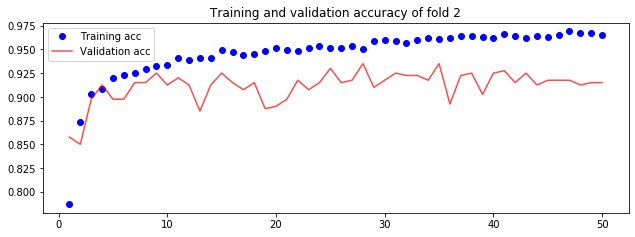

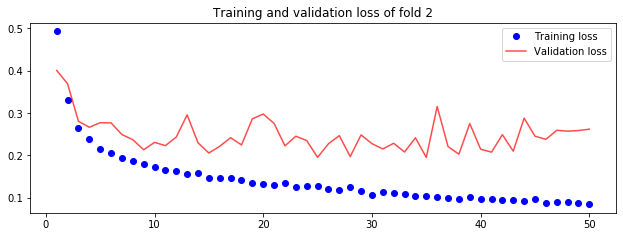

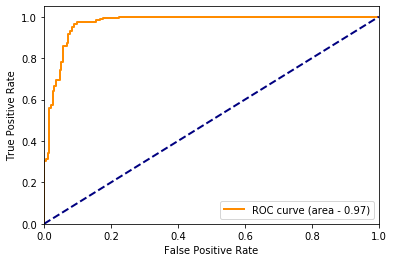

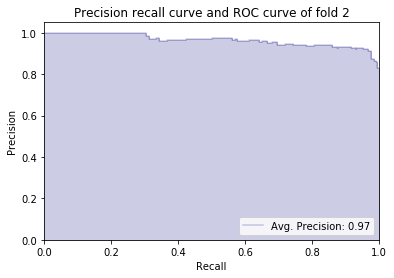

Epoch 1/50
450/450 - 2s - loss: 0.5038 - acc: 0.7711 - val_loss: 0.4305 - val_acc: 0.8375
Epoch 2/50
450/450 - 2s - loss: 0.3338 - acc: 0.8692 - val_loss: 0.3463 - val_acc: 0.8750
Epoch 3/50
450/450 - 2s - loss: 0.2684 - acc: 0.8983 - val_loss: 0.3032 - val_acc: 0.9000
Epoch 4/50
450/450 - 2s - loss: 0.2382 - acc: 0.9069 - val_loss: 0.2893 - val_acc: 0.9050
Epoch 5/50
450/450 - 2s - loss: 0.2156 - acc: 0.9189 - val_loss: 0.2719 - val_acc: 0.9025
Epoch 6/50
450/450 - 2s - loss: 0.1996 - acc: 0.9247 - val_loss: 0.2825 - val_acc: 0.9000
Epoch 7/50
450/450 - 2s - loss: 0.1942 - acc: 0.9278 - val_loss: 0.2832 - val_acc: 0.8925
Epoch 8/50
450/450 - 2s - loss: 0.1845 - acc: 0.9325 - val_loss: 0.2523 - val_acc: 0.8975
Epoch 9/50
450/450 - 2s - loss: 0.1758 - acc: 0.9325 - val_loss: 0.2496 - val_acc: 0.9050
Epoch 10/50
450/450 - 2s - loss: 0.1725 - acc: 0.9358 - val_loss: 0.2576 - val_acc: 0.9050
Epoch 11/50
450/450 - 2s - loss: 0.1656 - acc: 0.9394 - val_loss: 0.2531 - val_acc: 0.9075
Epoch 12

<Figure size 432x288 with 0 Axes>

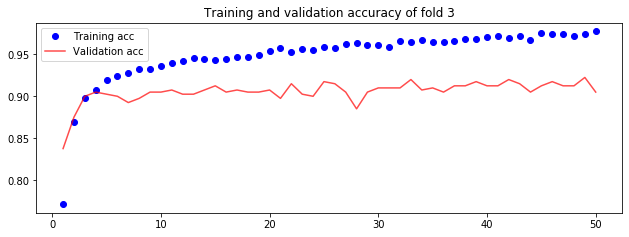

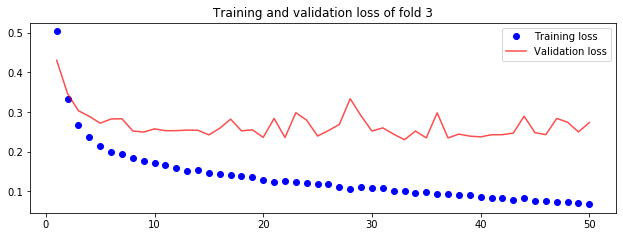

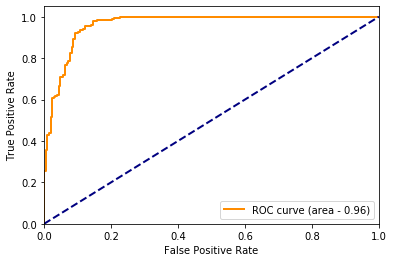

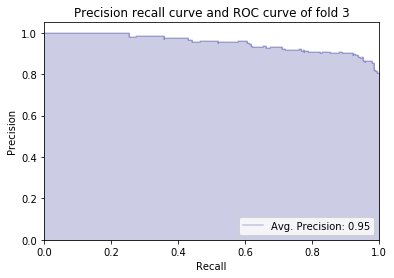

Epoch 1/50
450/450 - 2s - loss: 0.4833 - acc: 0.7833 - val_loss: 0.3880 - val_acc: 0.8525
Epoch 2/50
450/450 - 2s - loss: 0.3278 - acc: 0.8731 - val_loss: 0.3165 - val_acc: 0.8725
Epoch 3/50
450/450 - 2s - loss: 0.2669 - acc: 0.8958 - val_loss: 0.2555 - val_acc: 0.9150
Epoch 4/50
450/450 - 2s - loss: 0.2357 - acc: 0.9119 - val_loss: 0.2321 - val_acc: 0.9150
Epoch 5/50
450/450 - 2s - loss: 0.2147 - acc: 0.9253 - val_loss: 0.2213 - val_acc: 0.9175
Epoch 6/50
450/450 - 2s - loss: 0.2030 - acc: 0.9283 - val_loss: 0.2034 - val_acc: 0.9150
Epoch 7/50
450/450 - 2s - loss: 0.1945 - acc: 0.9250 - val_loss: 0.1958 - val_acc: 0.9225
Epoch 8/50
450/450 - 2s - loss: 0.1890 - acc: 0.9308 - val_loss: 0.1862 - val_acc: 0.9300
Epoch 9/50
450/450 - 2s - loss: 0.1844 - acc: 0.9336 - val_loss: 0.2157 - val_acc: 0.9125
Epoch 10/50
450/450 - 2s - loss: 0.1745 - acc: 0.9397 - val_loss: 0.1844 - val_acc: 0.9350
Epoch 11/50
450/450 - 2s - loss: 0.1735 - acc: 0.9364 - val_loss: 0.1870 - val_acc: 0.9300
Epoch 12

<Figure size 432x288 with 0 Axes>

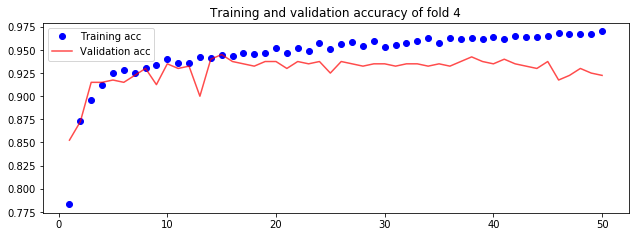

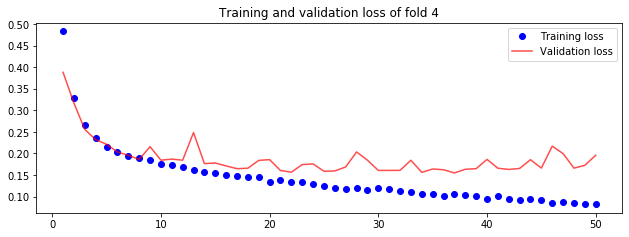

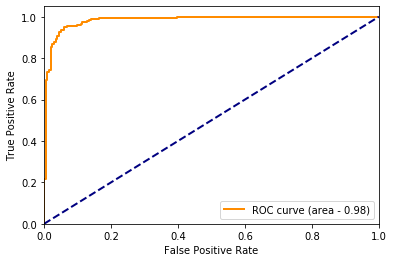

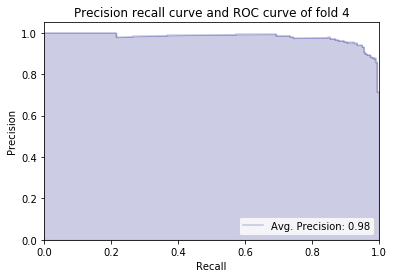

Epoch 1/50
450/450 - 2s - loss: 0.5079 - acc: 0.7747 - val_loss: 0.3925 - val_acc: 0.8825
Epoch 2/50
450/450 - 2s - loss: 0.3393 - acc: 0.8669 - val_loss: 0.3313 - val_acc: 0.8675
Epoch 3/50
450/450 - 2s - loss: 0.2775 - acc: 0.8944 - val_loss: 0.2690 - val_acc: 0.9125
Epoch 4/50
450/450 - 2s - loss: 0.2481 - acc: 0.9069 - val_loss: 0.2700 - val_acc: 0.8925
Epoch 5/50
450/450 - 2s - loss: 0.2277 - acc: 0.9111 - val_loss: 0.2356 - val_acc: 0.9225
Epoch 6/50
450/450 - 2s - loss: 0.2197 - acc: 0.9144 - val_loss: 0.2463 - val_acc: 0.9100
Epoch 7/50
450/450 - 2s - loss: 0.2042 - acc: 0.9222 - val_loss: 0.2504 - val_acc: 0.9050
Epoch 8/50
450/450 - 2s - loss: 0.1937 - acc: 0.9283 - val_loss: 0.2342 - val_acc: 0.9050
Epoch 9/50
450/450 - 2s - loss: 0.1927 - acc: 0.9281 - val_loss: 0.2239 - val_acc: 0.9150
Epoch 10/50
450/450 - 2s - loss: 0.1898 - acc: 0.9269 - val_loss: 0.2208 - val_acc: 0.9100
Epoch 11/50
450/450 - 2s - loss: 0.1769 - acc: 0.9350 - val_loss: 0.2378 - val_acc: 0.9050
Epoch 12

<Figure size 432x288 with 0 Axes>

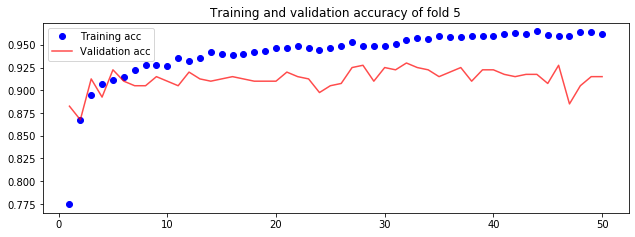

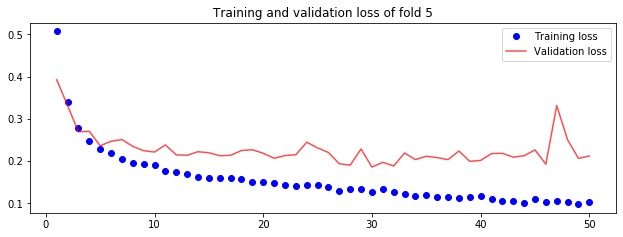

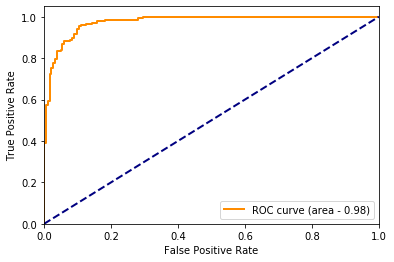

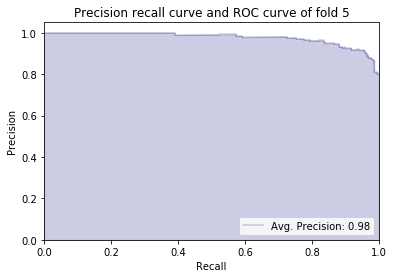

Epoch 1/50
450/450 - 2s - loss: 0.4758 - acc: 0.7983 - val_loss: 0.3870 - val_acc: 0.8650
Epoch 2/50
450/450 - 2s - loss: 0.3200 - acc: 0.8775 - val_loss: 0.3051 - val_acc: 0.8900
Epoch 3/50
450/450 - 2s - loss: 0.2654 - acc: 0.9028 - val_loss: 0.2766 - val_acc: 0.8925
Epoch 4/50
450/450 - 2s - loss: 0.2344 - acc: 0.9108 - val_loss: 0.2746 - val_acc: 0.8975
Epoch 5/50
450/450 - 2s - loss: 0.2256 - acc: 0.9144 - val_loss: 0.2402 - val_acc: 0.9050
Epoch 6/50
450/450 - 2s - loss: 0.2037 - acc: 0.9233 - val_loss: 0.2304 - val_acc: 0.9025
Epoch 7/50
450/450 - 2s - loss: 0.1974 - acc: 0.9275 - val_loss: 0.2432 - val_acc: 0.9050
Epoch 8/50
450/450 - 2s - loss: 0.1888 - acc: 0.9278 - val_loss: 0.2285 - val_acc: 0.9025
Epoch 9/50
450/450 - 2s - loss: 0.1835 - acc: 0.9336 - val_loss: 0.2264 - val_acc: 0.9075
Epoch 10/50
450/450 - 2s - loss: 0.1761 - acc: 0.9372 - val_loss: 0.2099 - val_acc: 0.9175
Epoch 11/50
450/450 - 2s - loss: 0.1734 - acc: 0.9367 - val_loss: 0.2041 - val_acc: 0.9175
Epoch 12

<Figure size 432x288 with 0 Axes>

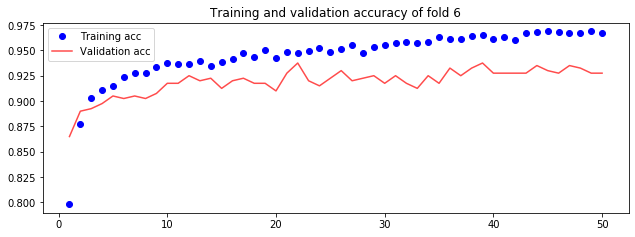

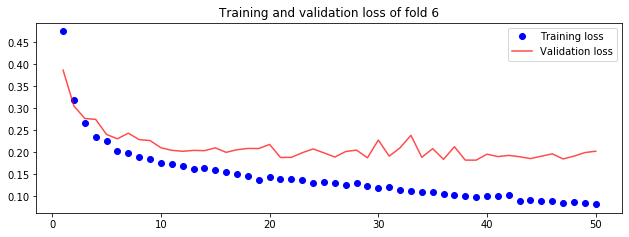

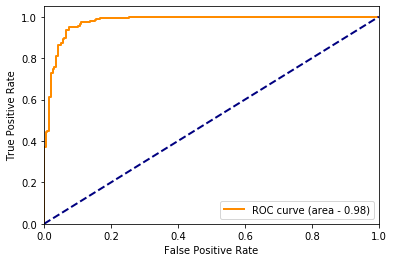

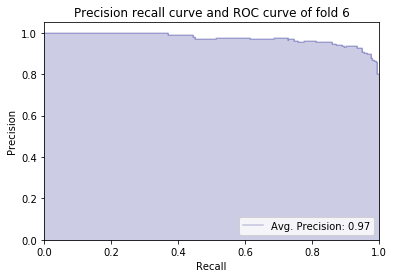

Epoch 1/50
450/450 - 2s - loss: 0.4978 - acc: 0.7783 - val_loss: 0.3893 - val_acc: 0.8625
Epoch 2/50
450/450 - 2s - loss: 0.3272 - acc: 0.8717 - val_loss: 0.3288 - val_acc: 0.8650
Epoch 3/50
450/450 - 2s - loss: 0.2664 - acc: 0.9022 - val_loss: 0.3159 - val_acc: 0.8550
Epoch 4/50
450/450 - 2s - loss: 0.2383 - acc: 0.9119 - val_loss: 0.2708 - val_acc: 0.8900
Epoch 5/50
450/450 - 2s - loss: 0.2189 - acc: 0.9164 - val_loss: 0.2941 - val_acc: 0.8675
Epoch 6/50
450/450 - 2s - loss: 0.2095 - acc: 0.9208 - val_loss: 0.2539 - val_acc: 0.8875
Epoch 7/50
450/450 - 2s - loss: 0.1960 - acc: 0.9258 - val_loss: 0.2471 - val_acc: 0.8975
Epoch 8/50
450/450 - 2s - loss: 0.1888 - acc: 0.9294 - val_loss: 0.2213 - val_acc: 0.9125
Epoch 9/50
450/450 - 2s - loss: 0.1860 - acc: 0.9314 - val_loss: 0.2190 - val_acc: 0.9175
Epoch 10/50
450/450 - 2s - loss: 0.1718 - acc: 0.9367 - val_loss: 0.2079 - val_acc: 0.9175
Epoch 11/50
450/450 - 2s - loss: 0.1726 - acc: 0.9328 - val_loss: 0.2442 - val_acc: 0.8975
Epoch 12

<Figure size 432x288 with 0 Axes>

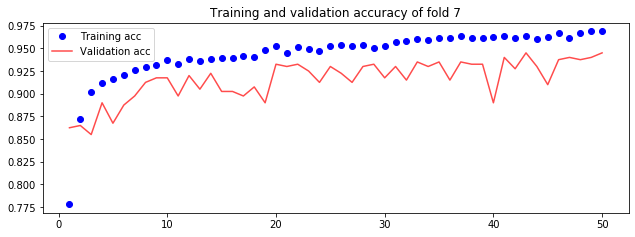

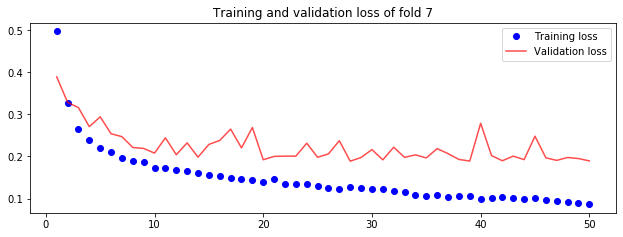

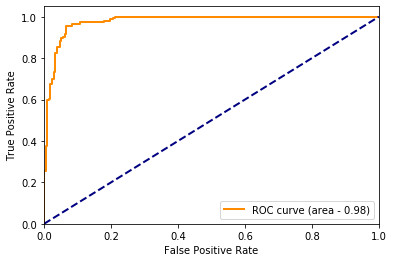

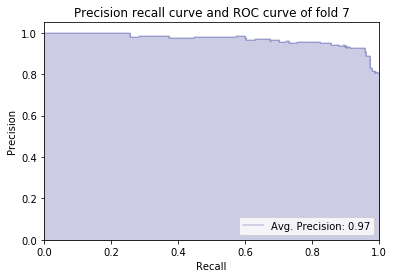

Epoch 1/50
450/450 - 2s - loss: 0.4921 - acc: 0.7886 - val_loss: 0.4163 - val_acc: 0.8500
Epoch 2/50
450/450 - 2s - loss: 0.3219 - acc: 0.8758 - val_loss: 0.3662 - val_acc: 0.8575
Epoch 3/50
450/450 - 2s - loss: 0.2721 - acc: 0.8961 - val_loss: 0.3420 - val_acc: 0.8650
Epoch 4/50
450/450 - 2s - loss: 0.2367 - acc: 0.9122 - val_loss: 0.2800 - val_acc: 0.8975
Epoch 5/50
450/450 - 2s - loss: 0.2203 - acc: 0.9178 - val_loss: 0.3160 - val_acc: 0.8725
Epoch 6/50
450/450 - 2s - loss: 0.2094 - acc: 0.9175 - val_loss: 0.2615 - val_acc: 0.9050
Epoch 7/50
450/450 - 2s - loss: 0.1968 - acc: 0.9264 - val_loss: 0.3239 - val_acc: 0.8600
Epoch 8/50
450/450 - 2s - loss: 0.1879 - acc: 0.9281 - val_loss: 0.2612 - val_acc: 0.9050
Epoch 9/50
450/450 - 2s - loss: 0.1871 - acc: 0.9275 - val_loss: 0.2274 - val_acc: 0.9150
Epoch 10/50
450/450 - 2s - loss: 0.1730 - acc: 0.9364 - val_loss: 0.2337 - val_acc: 0.9100
Epoch 11/50
450/450 - 2s - loss: 0.1775 - acc: 0.9336 - val_loss: 0.2122 - val_acc: 0.9175
Epoch 12

<Figure size 432x288 with 0 Axes>

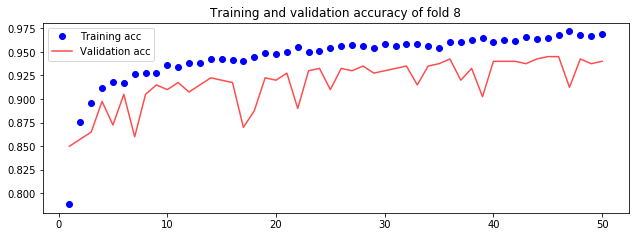

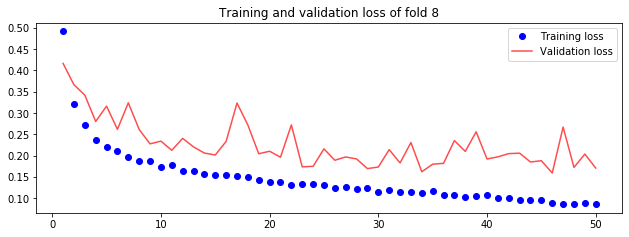

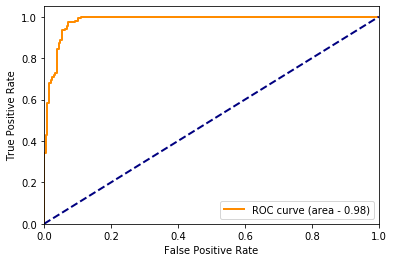

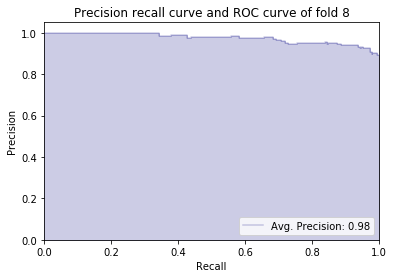

Epoch 1/50
450/450 - 2s - loss: 0.5080 - acc: 0.7747 - val_loss: 0.4236 - val_acc: 0.8225
Epoch 2/50
450/450 - 2s - loss: 0.3300 - acc: 0.8753 - val_loss: 0.3452 - val_acc: 0.8575
Epoch 3/50
450/450 - 2s - loss: 0.2666 - acc: 0.8983 - val_loss: 0.2874 - val_acc: 0.8950
Epoch 4/50
450/450 - 2s - loss: 0.2351 - acc: 0.9081 - val_loss: 0.2627 - val_acc: 0.9025
Epoch 5/50
450/450 - 2s - loss: 0.2156 - acc: 0.9233 - val_loss: 0.2473 - val_acc: 0.9200
Epoch 6/50
450/450 - 2s - loss: 0.2047 - acc: 0.9239 - val_loss: 0.2333 - val_acc: 0.9200
Epoch 7/50
450/450 - 2s - loss: 0.1911 - acc: 0.9231 - val_loss: 0.2354 - val_acc: 0.9125
Epoch 8/50
450/450 - 2s - loss: 0.1858 - acc: 0.9311 - val_loss: 0.3462 - val_acc: 0.8525
Epoch 9/50
450/450 - 2s - loss: 0.1837 - acc: 0.9256 - val_loss: 0.2490 - val_acc: 0.9025
Epoch 10/50
450/450 - 2s - loss: 0.1743 - acc: 0.9344 - val_loss: 0.2296 - val_acc: 0.9125
Epoch 11/50
450/450 - 2s - loss: 0.1659 - acc: 0.9342 - val_loss: 0.2350 - val_acc: 0.9050
Epoch 12

<Figure size 432x288 with 0 Axes>

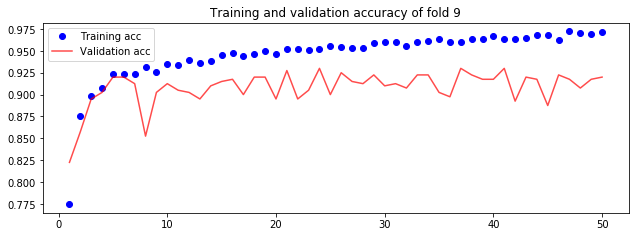

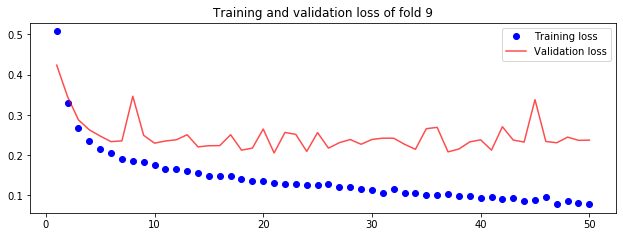

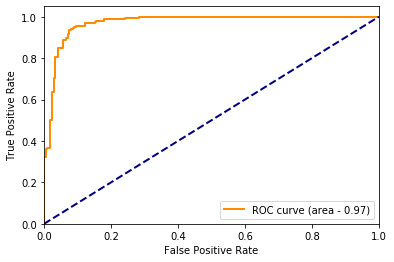

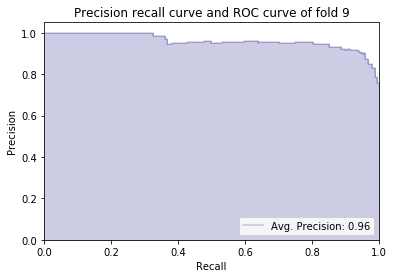

Epoch 1/50
450/450 - 2s - loss: 0.5094 - acc: 0.7675 - val_loss: 0.3749 - val_acc: 0.8750
Epoch 2/50
450/450 - 2s - loss: 0.3449 - acc: 0.8642 - val_loss: 0.2861 - val_acc: 0.9225
Epoch 3/50
450/450 - 2s - loss: 0.2789 - acc: 0.8972 - val_loss: 0.2300 - val_acc: 0.9300
Epoch 4/50
450/450 - 2s - loss: 0.2444 - acc: 0.9094 - val_loss: 0.2084 - val_acc: 0.9400
Epoch 5/50
450/450 - 2s - loss: 0.2233 - acc: 0.9133 - val_loss: 0.1914 - val_acc: 0.9400
Epoch 6/50
450/450 - 2s - loss: 0.2147 - acc: 0.9228 - val_loss: 0.1980 - val_acc: 0.9250
Epoch 7/50
450/450 - 2s - loss: 0.2004 - acc: 0.9269 - val_loss: 0.1956 - val_acc: 0.9225
Epoch 8/50
450/450 - 2s - loss: 0.1948 - acc: 0.9256 - val_loss: 0.1834 - val_acc: 0.9300
Epoch 9/50
450/450 - 2s - loss: 0.1838 - acc: 0.9333 - val_loss: 0.1657 - val_acc: 0.9350
Epoch 10/50
450/450 - 2s - loss: 0.1845 - acc: 0.9244 - val_loss: 0.1591 - val_acc: 0.9500
Epoch 11/50
450/450 - 2s - loss: 0.1755 - acc: 0.9317 - val_loss: 0.1671 - val_acc: 0.9350
Epoch 12

<Figure size 432x288 with 0 Axes>

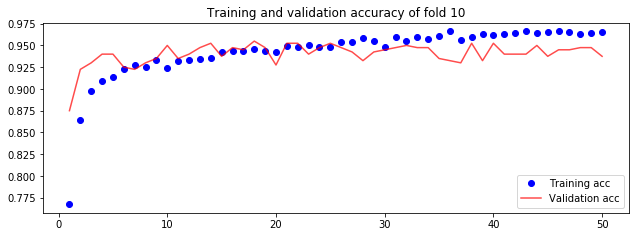

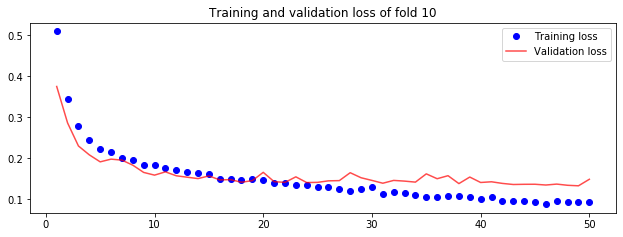

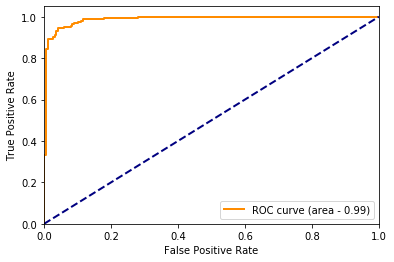

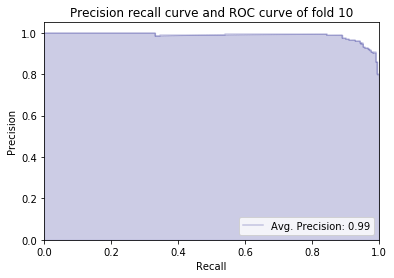

Epoch 1/50
450/450 - 2s - loss: 0.4916 - acc: 0.7958 - val_loss: 0.4082 - val_acc: 0.8350
Epoch 2/50
450/450 - 2s - loss: 0.3298 - acc: 0.8744 - val_loss: 0.3328 - val_acc: 0.8600
Epoch 3/50
450/450 - 2s - loss: 0.2720 - acc: 0.8972 - val_loss: 0.3418 - val_acc: 0.8475
Epoch 4/50
450/450 - 2s - loss: 0.2344 - acc: 0.9192 - val_loss: 0.2984 - val_acc: 0.8750
Epoch 5/50
450/450 - 2s - loss: 0.2141 - acc: 0.9217 - val_loss: 0.3042 - val_acc: 0.8750
Epoch 6/50
450/450 - 2s - loss: 0.2005 - acc: 0.9225 - val_loss: 0.2628 - val_acc: 0.8975
Epoch 7/50
450/450 - 2s - loss: 0.1915 - acc: 0.9286 - val_loss: 0.2813 - val_acc: 0.8850
Epoch 8/50
450/450 - 2s - loss: 0.1840 - acc: 0.9325 - val_loss: 0.2738 - val_acc: 0.8900
Epoch 9/50
450/450 - 2s - loss: 0.1749 - acc: 0.9322 - val_loss: 0.2895 - val_acc: 0.8875
Epoch 10/50
450/450 - 2s - loss: 0.1683 - acc: 0.9400 - val_loss: 0.2503 - val_acc: 0.9025
Epoch 11/50
450/450 - 2s - loss: 0.1586 - acc: 0.9378 - val_loss: 0.2431 - val_acc: 0.9075
Epoch 12

<Figure size 432x288 with 0 Axes>

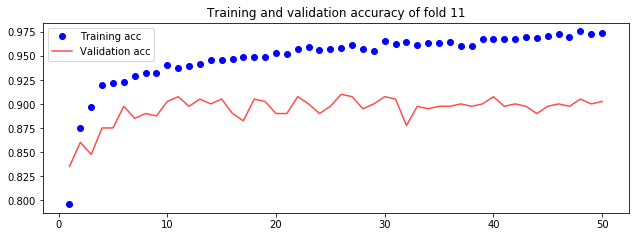

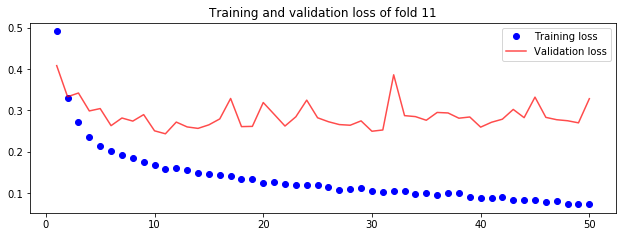

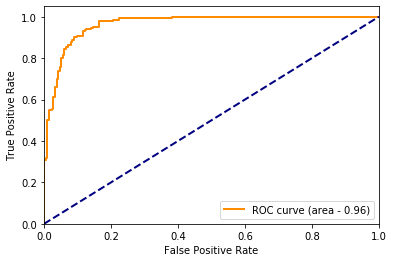

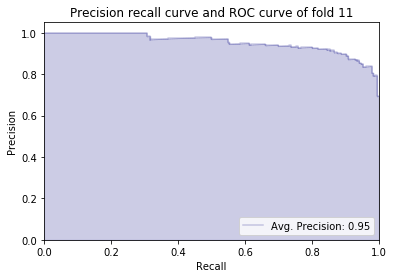

<Figure size 432x288 with 0 Axes>

In [77]:
import numpy as np
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import accuracy_score
from tensorflow.keras import optimizers
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, precision_recall_curve,average_precision_score, confusion_matrix, f1_score,matthews_corrcoef
from inspect import signature
split_data = ShuffleSplit(n_splits = 10, train_size = None, test_size = 0.1, random_state=1)
acc_per_fold = []
loss_per_fold = []
val_acc_per_fold = []
val_loss_per_fold = []
roc_per_fold = []
roc_fpr = []
roc_tpr = []
precision_fold = []
recall_fold = []
ave_precision_fold = []
n_iter =0
fold_num = []

for train_idx, test_idx in split_data.split(X_seq, Y_class):
    X_train = np.array(X_seq[train_idx])
    X_test = np.array(X_seq[test_idx])
    y_train = np.array(Y_class[train_idx])
    y_test = np.array(Y_class[test_idx])
    model = models.Sequential()
    model.add(layers.Conv1D(filters = params[0][1],kernel_size = params[0][2],strides = params[0][3],activation=activation_func, input_shape=(PEP_length,AA_type),kernel_regularizer=regularizer_params, bias_regularizer=regularizer_params,padding='same'))
    model.add(layers.Dropout(rate = params[1][1])) #add noise
    model.add(layers.MaxPool1D(pool_size = params[2][1], strides = params[2][2]))
    model.add(layers.Flatten())
    model.add(layers.Dense(params[4][1], activation=activation_func, kernel_regularizer=regularizer_params,bias_regularizer=regularizer_params))
    model.add(layers.Dense(1, activation='sigmoid')) #'softmax' for N class
    model.compile(loss='binary_crossentropy', optimizer=optimizers.Adam(learning_rate=0.000075), metrics=['acc'] )
    dict_history[model_version] = model.fit(x=X_train,y=y_train,shuffle=True, steps_per_epoch=steps_per_epoch, epochs=Epochs, batch_size = BATCH_SIZE, validation_data=(X_test, y_test), verbose=2)
    history = dict_history[model_version]
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    train_size = X_train.shape[0]
    test_size = X_test.shape[0]
    scores = model.evaluate(X_test, y_test, verbose=0)
    print(f'Score for fold {n_iter+1}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%\n')
    acc_per_fold.append(acc)
    loss_per_fold.append(loss)
    val_acc_per_fold.append(val_acc)
    val_loss_per_fold.append(val_loss)
    arr_acc = np.array(acc_per_fold)
    arr_loss = np.array(loss_per_fold)
    arr_val_acc = np.array(val_acc_per_fold)
    arr_val_loss = np.array(val_loss_per_fold)
    epochs = range(1, len(acc) + 1)
    pred = model.predict(x=X_test)
    fpr, tpr, thresholds = roc_curve(y_test, pred)
    roc_fpr.append(fpr)
    roc_tpr.append(tpr)
    roc_auc = auc(fpr, tpr)
    roc_per_fold.append(roc_auc)
    precision, recall, thresholds = precision_recall_curve(y_test, pred)
    average_precision = average_precision_score(y_test, pred)
    precision_fold.append(precision)
    recall_fold.append(recall)
    ave_precision_fold.append(average_precision)
    globals()['model_fname_{}'.format(n_iter+1)] = f'BBBphagedisplay_TEST_{n_iter+1}_{model_version:03}.h5'
    model_spath = os.path.join(model_path,f'model_fname_{n_iter+1}')
    model.save(model_spath)
    fold_num.append(n_iter+1)
    n_iter += 1
    epochs = range(1, len(acc) + 1)
    fig = plt.figure(figsize=(10.5,3.5))
    plt.plot(epochs, acc, 'bo', label='Training acc')
    plt.plot(epochs, val_acc, 'r', alpha=0.7, label='Validation acc')
    plt.title(f'Training and validation accuracy of fold {n_iter+1}')
    plt.legend()
    fig = plt.figure(figsize=(10.5,3.5))
    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'r', alpha=0.7, label='Validation loss')
    plt.title(f'Training and validation loss of fold {n_iter+1}')
    plt.legend()
    plt.show()
    pred = model.predict(x=X_test)
    fpr, tpr, thresholds = roc_curve(y_test, pred)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color='darkorange',
             lw=2, label='ROC curve (area - %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')
    plt.show()
    plt.cla()
    plt.clf()
    precision, recall, thresholds = precision_recall_curve(y_test, pred)
    average_precision = average_precision_score(y_test, pred)
    step_kwargs = ({'step': 'post'}
                   if 'step' in signature(plt.fill_between).parameters
                   else {})
    plt.step(recall, precision, color='navy', alpha=0.2, where='post', label='Avg. Precision: {0:0.2f}'.format(average_precision))
    plt.fill_between(recall, precision, alpha=0.2, color='navy', **step_kwargs)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.legend(loc='lower right')
    plt.title(f'Precision recall curve and ROC curve of fold {n_iter+1}')
    plt.show()
    plt.cla()
    plt.clf()

In [78]:
#Model save
model_fname = f'Cas9Predictor_TEST_{model_version:03}.cv.h5'
model_spath = os.path.join(model_path, model_fname)
print(model_spath)

/home/kyungha/Downloads/DeepSpCas9/models/Total_models_1/BBBphagedisplay_TEST_001.cv.h5


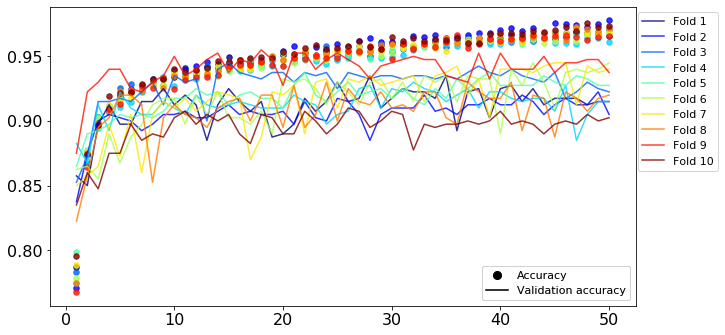

In [83]:
import matplotlib.pyplot as plt
import numpy as np
from cycler import cycler
import matplotlib.lines as mlines
num_plots = 10
n_iter = 0

plt.rcParams["font.size"] = 16
fig, ax = plt.subplots(figsize=(10.5,5.5))
ax.set_prop_cycle('color',[plt.cm.jet(i) for i in np.linspace(0, 1, num_plots)])
b_o = mlines.Line2D([], [], color='black', marker='o', linestyle='None', markersize=8)
b_line = mlines.Line2D([], [], color='black', linestyle='solid')
for i in range(n_iter, num_plots):
    plt.plot(epochs, arr_acc[i], 'o', markersize = 5.5, alpha= 0.8)
    i += 1
for i in range(n_iter, num_plots):
    plt.plot(epochs, arr_val_acc[i], alpha= 0.8, label= f'Fold {i+1}')
    i += 1
legend = plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1), frameon = True, fontsize = 11)
art_legend = plt.gca().add_artist(legend)
legend_2 = plt.legend(handles = [b_o, b_line], labels = ['Accuracy', 'Validation accuracy'], loc='lower right', frameon = True, fontsize = 11)
art_legend_2 = plt.gca().add_artist(legend_2)

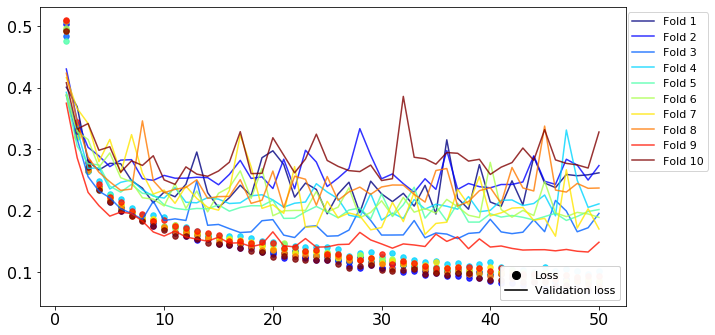

In [84]:
import matplotlib.pyplot as plt
import numpy as np
num_plots = 10
n_iter = 0

fig, ax = plt.subplots(figsize=(10.5,5.5))
ax.set_prop_cycle('color',[plt.cm.jet(i) for i in np.linspace(0, 1, num_plots)])
b_o = mlines.Line2D([], [], color='black', marker='o', linestyle='None', markersize=8)
b_line = mlines.Line2D([], [], color='black', linestyle='solid')
for i in range(n_iter, num_plots):
    plt.plot(epochs, arr_loss[i], 'o', markersize = 5.5, alpha= 0.8)
    i += 1
for i in range(n_iter, num_plots):
    plt.plot(epochs, arr_val_loss[i], alpha= 0.8, label= f'Fold {i+1}')
    i += 1
legend = plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1), frameon = True, fontsize = 11)
art_legend = plt.gca().add_artist(legend)
legend_2 = plt.legend(handles = [b_o, b_line], labels = ['Loss', 'Validation loss'], loc='lower right', frameon = True, fontsize = 11)
art_legend_2 = plt.gca().add_artist(legend_2)

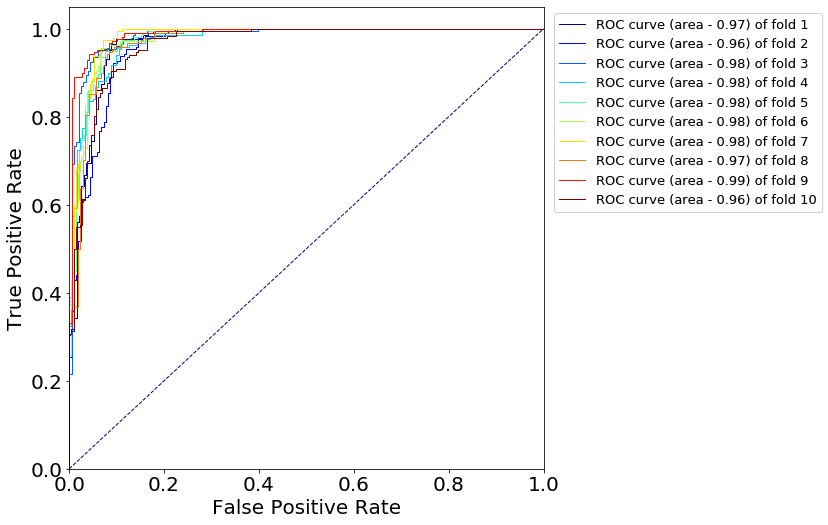

<Figure size 432x288 with 0 Axes>

In [85]:
num_plots = 10
n_iter = 0

fig, ax = plt.subplots(figsize=(8.5, 8.5))
ax.set_prop_cycle('color',[plt.cm.jet(i) for i in np.linspace(0, 1, num_plots)])
plt.plot([0, 1], [0, 1], color='navy', linewidth=1, linestyle='--')
for i in range(n_iter, num_plots):
    plt.plot(roc_fpr[i], roc_tpr[i], linewidth=1, label=f'ROC curve (area - %0.2f) of fold {i+1}' % roc_per_fold[i])
    i += 1
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize = 20)
plt.ylabel('True Positive Rate', fontsize = 20)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
legend = plt.legend(loc='upper right', bbox_to_anchor=(1.6, 1), frameon = True, fontsize = 13)
art_legend = plt.gca().add_artist(legend)
plt.show()
plt.cla()
plt.clf()

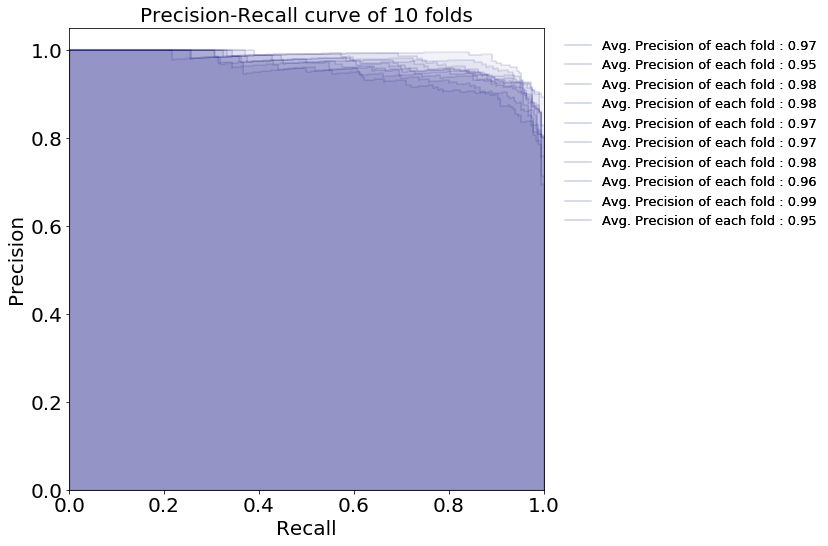

<Figure size 432x288 with 0 Axes>

In [86]:
num_plots = 10
n_iter = 0

fig, ax = plt.subplots(figsize=(8.5, 8.5))
ax.set_prop_cycle('color',[plt.cm.jet(i) for i in np.linspace(0, 1, num_plots)])
for i in range(n_iter, num_plots):
    step_kwargs = ({'step': 'post'}
                   if 'step' in signature(plt.fill_between).parameters
                   else {})
    plt.step(recall_fold[i], precision_fold[i], color='navy', alpha=0.1, where='post', label='Avg. Precision of each fold : {0:0.2f}'.format(ave_precision_fold[i]))
    plt.fill_between(recall_fold[i], precision_fold[i], alpha=0.05, color='navy', **step_kwargs)
    i += 1
plt.xlabel('Recall', fontsize = 20)
plt.ylabel('Precision', fontsize = 20)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
legend = plt.legend(loc='upper right', bbox_to_anchor=(1.6, 1), frameon = False, fontsize = 13)
art_legend = plt.gca().add_artist(legend)
plt.title(f'Precision-Recall curve of {i} folds', fontsize = 20)
plt.show()
plt.cla()
plt.clf()

In [192]:
pred = model.predict(x=X_test)

In [194]:
#Test the model
select_test = test_seq.sort_values(by = ["indel_freq"], axis = 0, ascending = False)
select_test_top = test_seq.head(100)
select_test_bot = test_seq.tail(100)

In [195]:
test_200 = pd.concat([select_test_top, select_test_bot], axis = 0)
test_200.shape

(200, 3)

In [207]:
val_pep = test_seq['#pseq'].tolist()
val_class = test_seq['class'].tolist()
val_encode = [one_hot_encoder(x) for x in val_pep]
val_encode = np.transpose(np.asarray(val_encode), (0, 2, 1))

In [208]:
model_fit = keras.models.load_model("/model_path/models/Model_num/Cas9Predictor_TEST_{model_version:03}.cv.h5")
val_score = model_fit.predict(val_encode)
val_score_flat = val_score.flatten()

In [209]:
model_fit.fit(val_encode, val_score_flat)

17/17 [==============================] - 0s 12ms/step - loss: 0.2951 - acc: 0.0000e+00


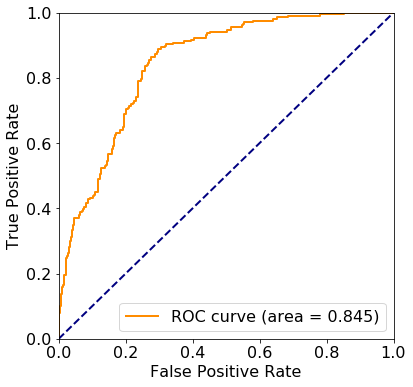

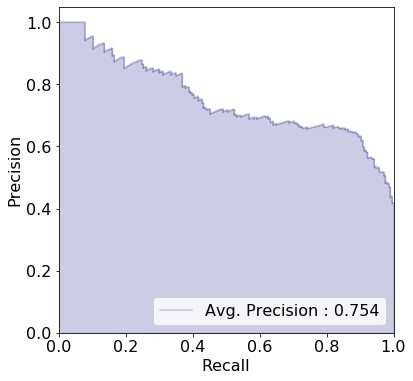

<Figure size 432x432 with 0 Axes>

In [210]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve,average_precision_score, confusion_matrix, f1_score,matthews_corrcoef
from inspect import signature

plt.rcParams["figure.figsize"] = (6, 6) 
plt.rcParams["font.size"] = 16
fpr, tpr, thresholds = roc_curve(val_class, val_score)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange',
         lw=2, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1])
plt.ylim([0.0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()
plt.cla()
plt.clf()

precision, recall, thresholds = precision_recall_curve(
    val_class, val_score
)
average_precision = average_precision_score(val_class, val_score)

step_kwargs = ({'step': 'post'}
               if 'step' in signature(plt.fill_between).parameters
               else {})
plt.step(recall, precision, color='navy', alpha=0.2, where='post',
         label='Avg. Precision : {0:0.3f}'.format(average_precision))
plt.fill_between(recall, precision, alpha=0.2, color='navy', **step_kwargs)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.legend(loc='lower right')
plt.show()
plt.cla()
plt.clf()

In [211]:
score_test = pd.DataFrame(val_score*100, columns = ["pred_score"])

In [213]:
test_table = pd.concat([test_200, score_test], axis=1)
test_table.to_csv("/file_location/Result_of_test_data.csv", sep = "\t")

,#pseq,indel_freq,class,pred_score
0,AAAACTGTGAGTGTGGGACCTGCTGGGGGC,44.125755,0.0,41.928291
1,AAACACAACCAATCCGAGGCCTTCTGGGTC,12.163189,0.0,0.004224
2,AAACTGTGAGTGTGGGACCTGCTGGGGGCT,68.901263,1.0,99.534515
3,AAACTTGAGAGCTTTCATAAAGCTTGGCAA,13.135690,0.0,3.630364
4,AAAGAAGCGGACTTTAAAGTTCGAGGGAGA,48.355156,0.0,20.514950
